# ***What to do next***

GAN Network layer fix and add

Use more images

Use label smoothing

Set the noise differently

Apply latest GAN model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "drive/MyDrive/kaggle/"

!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d .

100% 1.33G/1.33G [01:09<00:00, 24.8MB/s]
100% 1.33G/1.33G [01:09<00:00, 20.6MB/s]


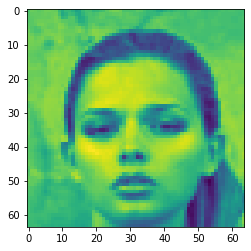

(50000, 64, 64)


In [3]:
from PIL import Image
import os
import numpy as np

file_list = os.listdir('/content/img_align_celeba/img_align_celeba')

images = []

for i in file_list[0:50000]:
  images_to_number = Image.open('/content/img_align_celeba/img_align_celeba/' + i).crop((20,30,160,180)).convert('L').resize(( 64,64))
  images.append(np.array(images_to_number))

import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

images = np.array(images)
print(images.shape)



In [4]:
images = np.divide(images,255)
images = images.reshape(50000,64,64,1)
print(images.shape)

(50000, 64, 64, 1)


In [5]:
import tensorflow as tf

discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', input_shape=[64, 64, 1]),
    tf.keras.layers.LeakyReLU(alpha = 0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3, 3), strides = (2, 2), padding = 'same'),
    tf.keras.layers.LeakyReLU(alpha = 0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [6]:
generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape = (100,)),
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

In [7]:
GAN = tf.keras.models.Sequential([generator, discriminator])

discriminator.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy'
)
discriminator.trainable = False

GAN.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [8]:
def picture():
  random_number = np.random.uniform(-1, 1, size = (10, 100))
  predict = generator.predict(random_number)

  for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(predict[i].reshape(64, 64), cmap = 'gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
for j in range(300):
  print(f'{j} epoch 입니다.')
  picture()

  for i in range(50000//128):
    
    #Discriminator
    real_image = images[i * 128 : (i + 1) * 128]
    matrix_filled_with_ones = np.ones(shape = (128, 1))
    loss1 = discriminator.train_on_batch(real_image, matrix_filled_with_ones)

    random_number = np.random.uniform(-1, 1, size = (128, 100))
    face_images = generator.predict(random_number)
    matrix_filled_with_zeros = np.zeros(shape = (128, 1))
    loss2 = discriminator.train_on_batch(face_images, matrix_filled_with_zeros)

    #Generator

    random_number = np.random.uniform(-1, 1, size = (128, 100))
    matrix_filled_with_ones = np.ones(shape = (128,1))

    loss3 = GAN.train_on_batch(random_number, matrix_filled_with_ones)

  print(f'Discriminator의 loss는 {loss1 + loss2}입니다.\nGenerator의 loss는 {loss3}입니다.')

Output hidden; open in https://colab.research.google.com to view.